# Notebook reading VisiumHD Dataset of Mouse Lung
- Dataset: https://www.10xgenomics.com/datasets/visium-hd-cytassist-gene-expression-mouse-lung-fresh-frozen
- Created by: Christian Eger
- Created on: 5th of November 2024
- Environment: environments/squidpy-env

## Setup

### Import modules

In [2]:
from pathlib import Path
import scanpy as sc
import squidpy as sq
from datetime import datetime
import rapids_singlecell as rsc
import bin2cell as b2c

/home/ceger/miniforge3/envs/bin2cell-env/lib/python3.10/site-packages/numba/core/decorators.py:246: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)
/home/ceger/miniforge3/envs/bin2cell-env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Setup paths

In [3]:
notebook_path = Path.cwd() / "1-Turning_bins_2_cells.ipynb"
notebook_execution_time = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
repo_path = Path.cwd().parent
data_folder_path = repo_path / ".data"
spatial_data_path = data_folder_path / "raw" / "VisiumHD_Mouse_Lung" / "binned_outputs" / "square_002um"
adata_path = data_folder_path / "processed" / "preprocessing" / "2024-11-05_19-08-36_VisiumHD_mouse_lung_square_002um.h5ad"

### Loading Data

In [13]:
str(data_folder_path / "raw" / "VisiumHD_Mouse_Lung" / "spatial" / hires_image)

'/mnt/LaCIE/ceger/Projects/SocialNichesHD/.data'

In [3]:
hires_image = "cytassist_image.tiff"
adata = b2c.read_visium(
    spatial_data_path, 
    library_id="Visium_HD_Mouse_Lung_Fresh_Frozen",
    source_image_path=hires_image
    #spaceranger_image_path = "spatial"
)
adata.uns["spatial"]["Visium_HD_Mouse_Lung_Fresh_Frozen"]["metadata"]["source_image_path"] = str(spatial_data_path / "spatial" / hires_image)
adata.var_names_make_unique()
adata

anndata.py (1756): Variable names are not unique. To make them unique, call `.var_names_make_unique`.
anndata.py (1756): Variable names are not unique. To make them unique, call `.var_names_make_unique`.


AnnData object with n_obs × n_vars = 9157834 × 19059
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'

In [14]:
hires_image = "tissue_hires_image.png"
adata = b2c.read_visium(
    spatial_data_path, 
    library_id="Visium_HD_Mouse_Lung_Fresh_Frozen",
    source_image_path=hires_image
    #spaceranger_image_path = "spatial"
)
#adata.uns["spatial"]["Visium_HD_Mouse_Lung_Fresh_Frozen"]["metadata"]["source_image_path"] = str(spatial_data_path / "spatial" / hires_image)
adata.uns["spatial"]["Visium_HD_Mouse_Lung_Fresh_Frozen"]["metadata"]["source_image_path"] = str(data_folder_path / "raw" / "VisiumHD_Mouse_Lung" / "spatial" / hires_image)
adata.var_names_make_unique()
adata

anndata.py (1756): Variable names are not unique. To make them unique, call `.var_names_make_unique`.
anndata.py (1756): Variable names are not unique. To make them unique, call `.var_names_make_unique`.


AnnData object with n_obs × n_vars = 9157834 × 19059
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'

In [ ]:
adata.uns["spatial"]["Visium_HD_Mouse_Lung_Fresh_Frozen"]["images"]["hires"]

array([[[0.9411765 , 0.9372549 , 0.9529412 ],
        [0.9411765 , 0.9372549 , 0.9490196 ],
        [0.9411765 , 0.9372549 , 0.9529412 ],
        ...,
        [0.9372549 , 0.9372549 , 0.9490196 ],
        [0.9411765 , 0.9372549 , 0.9529412 ],
        [0.9411765 , 0.93333334, 0.9490196 ]],

       [[0.9372549 , 0.9372549 , 0.9529412 ],
        [0.9372549 , 0.9372549 , 0.9529412 ],
        [0.9411765 , 0.9372549 , 0.9490196 ],
        ...,
        [0.9372549 , 0.93333334, 0.9490196 ],
        [0.9411765 , 0.9372549 , 0.9529412 ],
        [0.9372549 , 0.9372549 , 0.9490196 ]],

       [[0.9372549 , 0.9372549 , 0.9529412 ],
        [0.9411765 , 0.9411765 , 0.9490196 ],
        [0.9411765 , 0.9372549 , 0.9490196 ],
        ...,
        [0.93333334, 0.93333334, 0.94509804],
        [0.9372549 , 0.93333334, 0.9490196 ],
        [0.9372549 , 0.9372549 , 0.9490196 ]],

       ...,

       [[0.9372549 , 0.93333334, 0.9490196 ],
        [0.9372549 , 0.93333334, 0.94509804],
        [0.93333334, 0

In [10]:

adata.uns["spatial"]["Visium_HD_Mouse_Lung_Fresh_Frozen"]["metadata"]["source_image_path"]

'/mnt/LaCIE/ceger/Projects/SocialNichesHD/.data/raw/VisiumHD_Mouse_Lung/binned_outputs/square_002um/spatial/tissue_hires_image.png'

In [6]:
adata.uns["spatial"]["Visium_HD_Mouse_Lung_Fresh_Frozen"]["metadata"]["source_image_path"] = str(spatial_data_path / "spatial" / "tissue_hires_image.png")
adata.uns["spatial"]["Visium_HD_Mouse_Lung_Fresh_Frozen"]["metadata"]["source_image_path"]


'/mnt/LaCIE/ceger/Projects/SocialNichesHD/.data/raw/VisiumHD_Mouse_Lung/binned_outputs/square_002um/spatial/tissue_hires_image.png'

In [24]:
adata.uns["spatial"]["Visium_HD_Mouse_Lung_Fresh_Frozen"]["metadata"]["source_image_path"] = str(spatial_data_path / "spatial" / "cytassist_image.tiff")

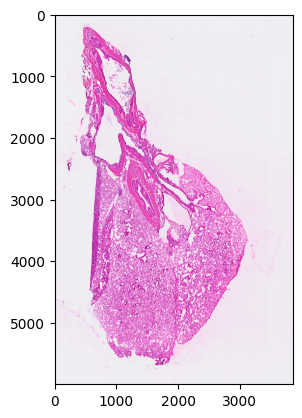

In [10]:
import matplotlib.pyplot as plt
plt.imshow(adata.uns["spatial"]["Visium_HD_Mouse_Lung_Fresh_Frozen"]["images"]["hires"])

In [ ]:


path = "binned_outputs/square_002um/"
#the image you used for --image of spaceranger, that's the one the spatial coordinates are based on
source_image_path = "Visium_HD_Mouse_Brain_tissue_image.tif"
spaceranger_image_path = "spatial"



In [4]:
adata = sc.read_h5ad(adata_path)
adata

AnnData object with n_obs × n_vars = 9157834 × 19059
    obs: 'in_tissue', 'array_row', 'array_col', 'location_id', 'region'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'log', 'spatial', 'spatialdata_attrs'
    obsm: 'spatial'

In [10]:

adata.uns["spatial"]["Visium_HD_Mouse_Lung_Fresh_Frozen"] = dict()
adata.uns["spatial"]["Visium_HD_Mouse_Lung_Fresh_Frozen"]["metadata"] = dict()

In [11]:
adata.uns["spatial"]["Visium_HD_Mouse_Lung_Fresh_Frozen"]["metadata"]["source_image_path"] = str(data_folder_path / "raw" / "VisiumHD_Mouse_Lung" / "spatial" / "tissue_hires_image.png")

In [4]:
sc.pp.filter_genes(adata, min_cells=3)
sc.pp.filter_cells(adata, min_counts=1)
adata

AnnData object with n_obs × n_vars = 9117867 × 17743
    obs: 'in_tissue', 'array_row', 'array_col', 'n_counts'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells'
    uns: 'spatial'
    obsm: 'spatial'

In [5]:
adata.uns["spatial"].keys()

dict_keys(['Visium_HD_Mouse_Lung_Fresh_Frozen'])

In [23]:
import cv2
img = cv2.imread('/mnt/LaCIE/ceger/Projects/SocialNichesHD/.data/raw/VisiumHD_Mouse_Lung/binned_outputs/square_002um/spatial/cytassist_image.tiff')

In [7]:
adata.obsm["spatial"][:,0]

array([16245.74314882, 23474.72825854, 10428.92324248, ...,
       12202.84171277, 18789.92339222, 10501.49761096])

In [12]:
mpp = 0.3
b2c.scaled_he_image(adata, mpp=mpp, save_path="he.tiff")

KeyError: 'metadata'